Predicted output values: [[158.57  10.  ]]
Mean Absolute Error: 7.677291666666665
Mean Squared Error: 190.81572291666663
R2 Score: 0.8881138898313712


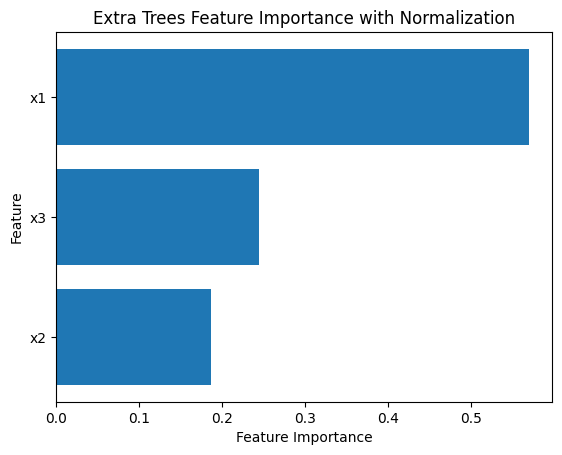

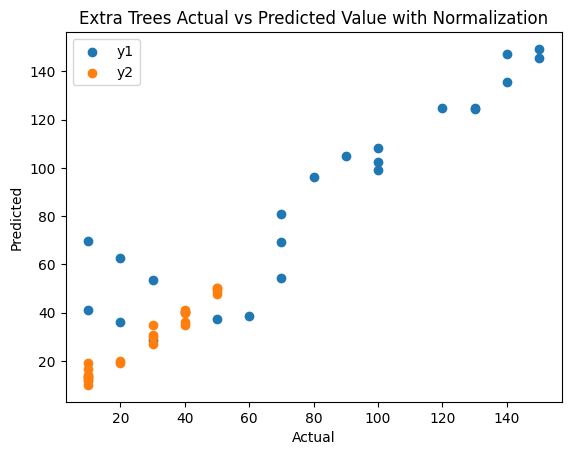

['extra_tree_model.pkl']

In [2]:
#ExtraTree Regression
import pandas as pd
from sklearn.ensemble import ExtraTreesRegressor 
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn import preprocessing
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import joblib
# Load data from Excel file

df = pd.read_excel("data.xlsx")

# Extract input and output data
X = df.iloc[:, :3]  
Y = df.iloc[:, 3:]  

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, random_state=42, test_size=0.3)

# Normalize the data using min-max scaling
scaler = preprocessing.MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train an Extra Trees regression model
model = ExtraTreesRegressor(n_estimators=1000, random_state=42) 
model.fit(X_train_scaled, y_train)

# Predict output values for the testing set
y_pred = model.predict(X_test_scaled)

# Evaluate the performance of the model using standard loss functions
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Predicted output values:", model.predict([[19.666, 121.64, 342.41]])) 
# Actual output values: [[300 2]]
print('Mean Absolute Error:', mae)
print('Mean Squared Error:', mse)
print('R2 Score:', r2)

# Plot feature importance
importances = model.feature_importances_
features = df.columns[:3]  
sorted_idx = importances.argsort()
sorted_features = features[sorted_idx]
plt.barh(sorted_features, importances[sorted_idx])
plt.xlabel("Feature Importance")
plt.ylabel("Feature")
plt.title("Extra Trees Feature Importance with Normalization")
plt.show()

# Plot actual vs predicted values
for i, output_feature in enumerate(Y.columns):
    plt.scatter(y_test.iloc[:, i], y_pred[:, i], label=output_feature)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Extra Trees Actual vs Predicted Value with Normalization")
plt.legend()
plt.show()
# Save the trained model
joblib.dump(model, 'extra_tree_model.pkl')

In [3]:


#Random Forest Regression

import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
import joblib

# Load data from Excel file
df = pd.read_excel("data.xlsx")

# Extract input and output data
X = df.iloc[:, 0:3]
Y = df.iloc[:, 3:5]

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, random_state=42, test_size=0.3)

# Normalize the data using min-max scaling
min_max_scaler = preprocessing.MinMaxScaler()
X_train_scaled = min_max_scaler.fit_transform(X_train)
X_test_scaled = min_max_scaler.transform(X_test)

# Train a random forest regression model
model = RandomForestRegressor(n_estimators=1000, max_features='sqrt', random_state=42)
model.fit(X_train_scaled, y_train)

# Predict output values for the testing set
y_pred = model.predict(X_test_scaled)

# Evaluate the performance of the model using standard loss functions
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print the evaluation metrics
print('Mean Absolute Error:', mae)
print('Mean Squared Error:', mse)
print('R2 Score:', r2)

# Save the trained model
joblib.dump(model, 'random_forest_model.pkl')

Mean Absolute Error: 12.071458333333334
Mean Squared Error: 364.8663645833333
R2 Score: 0.7924208366767889


['random_forest_model.pkl']

R-squared: 0.9731094661870736
MSE: 37.96009421840307
MAE: 3.835151918861999
RMSE: 6.161176366441969


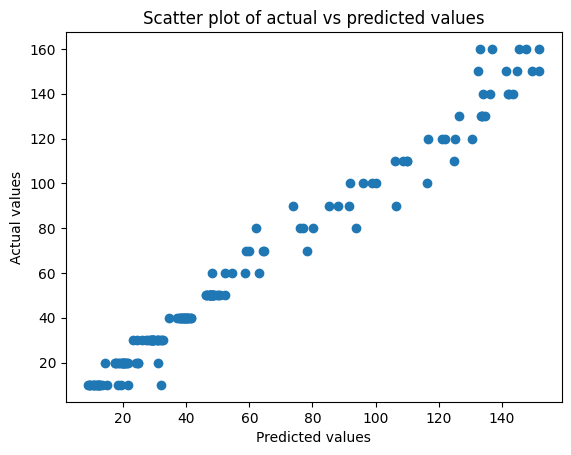

['Guassian_Regression_model.pkl']

In [6]:

#Guassian Regression
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

# Read data from Excel file
data = pd.read_excel('data.xlsx')

# Separate input features and target variable
X = data.iloc[:, :3].values
y = data.iloc[:, 3:].values

# Perform normalization
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Define and fit Gaussian regression model
kernel = RBF(length_scale=[1.0]*X.shape[1], length_scale_bounds=(1e-2, 1e2))
model = GaussianProcessRegressor(kernel=kernel, alpha=0.1, n_restarts_optimizer=5)
model.fit(X, y)

# Make predictions for new input data
new_X = [[19.646,120.56,340.7]]  # Example new input data
new_X = scaler.transform(new_X)
y_pred = model.predict(new_X)

# Predict on test data
y_pred_test = model.predict(X)

# Calculate evaluation metrics
r2 = r2_score(y, y_pred_test)
mse = mean_squared_error(y, y_pred_test)
mae = mean_absolute_error(y, y_pred_test)
rmse = np.sqrt(mse)

print('R-squared:', r2)
print('MSE:', mse)
print('MAE:', mae)
print('RMSE:', rmse)

# Scatter plot of actual vs predicted values
plt.scatter(y_pred_test, y)
plt.xlabel('Predicted values')
plt.ylabel('Actual values')
plt.title('Scatter plot of actual vs predicted values')
plt.show()
# Save the trained model
joblib.dump(model, 'Guassian_Regression_model.pkl')